<a href="https://colab.research.google.com/github/peumuoe/Mid-project/blob/main/mid_project_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# X(입력 변수)에서 문자형 데이터 확인
categorical_columns = X.select_dtypes(include=['object']).columns
print("⚠ 문자형(범주형) 변수 목록:", categorical_columns)


⚠ 문자형(범주형) 변수 목록: Index(['gender', 'NationalITy', 'PlaceofBirth', 'GradeID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction'],
      dtype='object')


📌 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    int64  
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   RaisedHands               480 non-null    float64
 10  VisitedResources          480 non-null    float64
 11  ViewingAnnouncements      480 non-null    float64
 12  DiscussionGroups          480 non-null    float64
 13  ParentAnsweringSurvey     480 non-null    object 
 1

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

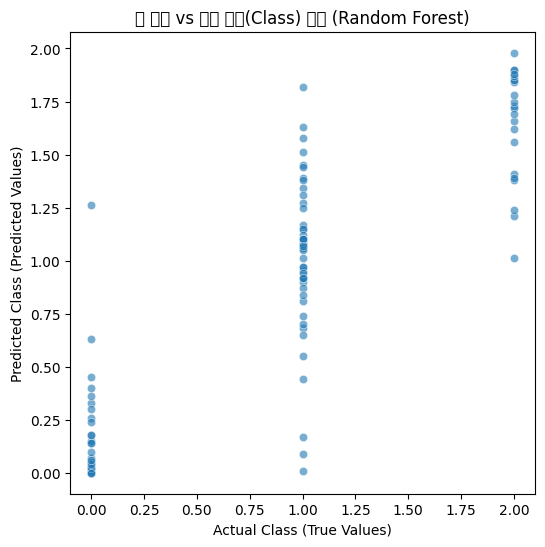

In [ ]:
# 📌 1️⃣ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 2️⃣ Google Colab에서 CSV 파일 불러오기
file_path = "processed_xAPI-Edu-Data.csv"  # 업로드된 파일 확인 후 변경 가능
df = pd.read_csv(file_path)

# 📌 3️⃣ 데이터 확인
print("📌 데이터프레임 정보:")
print(df.info())

print("\n📌 결측값 개수:")
print(df.isnull().sum())

# 📌 4️⃣ 타겟 변수(Class) 변환: 숫자로 변환 (H > M > L)
class_mapping = {"L": 0, "M": 1, "H": 2}
df["Class"] = df["Class"].map(class_mapping)

# 📌 5️⃣ 모든 문자형 변수(Label Encoding 적용)
categorical_columns = df.select_dtypes(include=['object']).columns
print("\n⚠ 문자형(범주형) 변수 목록:", categorical_columns)

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 인코더 저장

# 📌 6️⃣ 특성과 타겟 데이터 분리
X = df.drop(columns=["Class"])  # 입력 변수 (특성)
y = df["Class"]  # 타겟 변수 (성적 예측)

# 📌 7️⃣ 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 8️⃣ 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 🔟 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 1️⃣1️⃣ 예측 수행
y_pred = model.predict(X_test)

# 📌 1️⃣2️⃣ 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"\n📊 모델 성능 평가 결과 (Random Forest)")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# 📌 1️⃣3️⃣ 실제 vs 예측값 시각화
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Class (True Values)")
plt.ylabel("Predicted Class (Predicted Values)")
plt.title("📊 실제 vs 예측 성적(Class) 비교 (Random Forest)")
plt.show()



📊 모델 성능 평가 결과 (Random Forest)
Mean Squared Error (MSE): 0.1548
R-Squared (R²): 0.6893


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

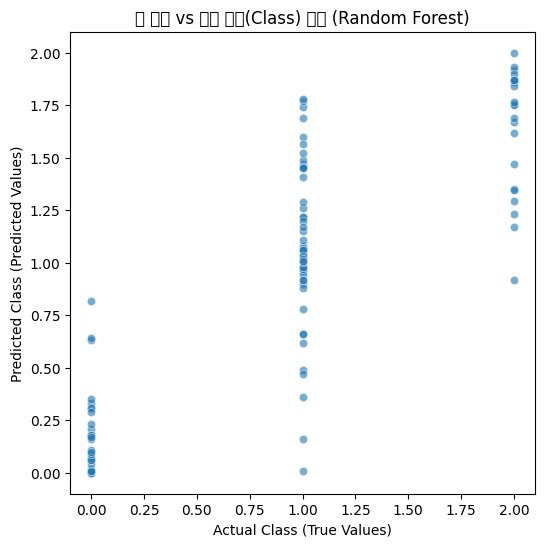


📌 예측된 성적(Class): Medium (M)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 📌 1️⃣ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 2️⃣ Colab에 업로드된 CSV 파일 불러오기
file_path = "processed_xAPI-Edu-Data.csv"  # Colab 파일 탐색기에서 업로드된 파일 확인 후 수정 가능
df = pd.read_csv(file_path)

# 📌 3️⃣ 담당 변수만 선택 (성적 예측에 사용할 특성)
features = ["RaisedHands", "VisitedResources", "ViewingAnnouncements", "DiscussionGroups", "StudentAbsenceDays"]
X = df[features]  # 입력 변수 (담당 변수)
y = df["Class"]  # 타겟 변수 (성적 예측)

# 📌 4️⃣ 타겟 변수(Class) 변환: 숫자로 변환 (H > M > L)
class_mapping = {"L": 0, "M": 1, "H": 2}
y = y.map(class_mapping)

# 📌 5️⃣ 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 6️⃣ 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 7️⃣ 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 8️⃣ 예측 수행 및 모델 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 📌 9️⃣ 결과 출력
print(f"\n📊 모델 성능 평가 결과 (Random Forest)")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# 📌 🔟 실제 vs 예측값 시각화
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Class (True Values)")
plt.ylabel("Predicted Class (Predicted Values)")
plt.title("📊 실제 vs 예측 성적(Class) 비교 (Random Forest)")
plt.show()

# 📌 1️⃣1️⃣ 새로운 학생의 데이터를 입력하여 성적 예측하는 함수
def predict_student_performance(raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days):
    # 입력 데이터 생성 (담당 변수만 사용)
    new_data = np.array([[raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days]])

    # 데이터 스케일링 적용
    new_data_scaled = scaler.transform(new_data)

    # 예측 수행
    predicted_class = model.predict(new_data_scaled)[0]

    # 예측된 성적을 H, M, L로 변환
    class_labels = {0: "Low (L)", 1: "Medium (M)", 2: "High (H)"}
    predicted_class_label = class_labels[round(predicted_class)]  # 반올림하여 정수 변환

    return predicted_class_label

# 📌 1️⃣2️⃣ 예제: 특정 학생의 학습 패턴을 입력하여 성적 예측
predicted_score = predict_student_performance(
    raised_hands=30,  # 수업 중 손을 든 횟수
    visited_resources=20,  # 자료 방문 횟수
    viewing_announcements=15,  # 공지 확인 횟수
    discussion_groups=10,  # 토론 그룹 참여 횟수
    absence_days=2  # 결석 일수
)

print(f"\n📌 예측된 성적(Class): {predicted_score}")


In [ ]:
# 📌 예측 함수 수정 (경고 해결)
def predict_student_performance(raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days):
    # 입력 데이터를 DataFrame 형태로 변환 (컬럼명 추가)
    new_data = pd.DataFrame([[raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days]],
                            columns=["RaisedHands", "VisitedResources", "ViewingAnnouncements", "DiscussionGroups", "StudentAbsenceDays"])

    # 데이터 스케일링 적용
    new_data_scaled = scaler.transform(new_data)

    # 예측 수행
    predicted_class = model.predict(new_data_scaled)[0]

    # 예측된 성적을 H, M, L로 변환
    class_labels = {0: "Low (L)", 1: "Medium (M)", 2: "High (H)"}
    predicted_class_label = class_labels[round(predicted_class)]  # 반올림하여 정수 변환

    return predicted_class_label

# 📌 예제: 특정 학생의 학습 패턴을 입력하여 성적 예측
predicted_score = predict_student_performance(
    raised_hands=30,  # 수업 중 손을 든 횟수
    visited_resources=20,  # 자료 방문 횟수
    viewing_announcements=15,  # 공지 확인 횟수
    discussion_groups=10,  # 토론 그룹 참여 횟수
    absence_days=2  # 결석 일수
)

print(f"\n📌 예측된 성적(Class): {predicted_score}")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 다운로드 및 설정 (Colab 전용)
!sudo apt-get install -y fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')

# Colab에서 변경된 폰트 설정을 반영하기 위해 런타임 재시작이 필요할 수도 있음
print("✅ 한글 폰트가 설정되었습니다. 그래프를 다시 실행하세요!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125044 files and direc

In [ ]:
# 한글 폰트 설치 (Google Colab 전용)
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 폰트 적용 확인
print("✅ 한글 폰트 설정 완료! 이제 그래프를 다시 실행하세요.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

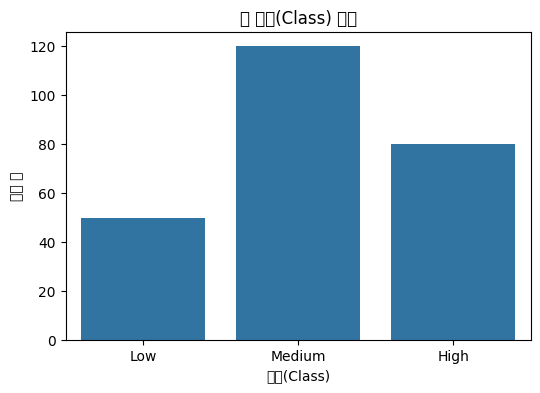

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 간단한 예제 그래프 (한글 테스트)
data = {"성적(Class)": ["Low", "Medium", "High"], "학생 수": [50, 120, 80]}
df = pd.DataFrame(data)

plt.figure(figsize=(6,4))
sns.barplot(x="성적(Class)", y="학생 수", data=df)
plt.title("📊 성적(Class) 분포")
plt.show()



📊 모델 성능 평가 결과 (Random Forest)
Mean Squared Error (MSE): 0.1548
R-Squared (R²): 0.6893


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


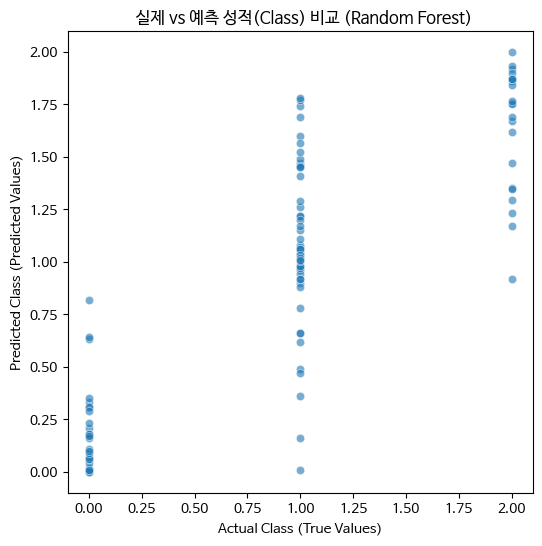


📌 예측된 성적(Class): Medium (M)


In [ ]:
# 📌 1️⃣ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 2️⃣ Colab에 업로드된 CSV 파일 불러오기
file_path = "processed_xAPI-Edu-Data.csv"  # Colab 파일 탐색기에서 업로드된 파일 확인 후 수정 가능
df = pd.read_csv(file_path)

# 📌 3️⃣ 담당 변수만 선택 (성적 예측에 사용할 특성)
features = ["RaisedHands", "VisitedResources", "ViewingAnnouncements", "DiscussionGroups", "StudentAbsenceDays"]
X = df[features]  # 입력 변수 (담당 변수)
y = df["Class"]  # 타겟 변수 (성적 예측)

# 📌 4️⃣ 타겟 변수(Class) 변환: 숫자로 변환 (H > M > L)
class_mapping = {"L": 0, "M": 1, "H": 2}
y = y.map(class_mapping)

# 📌 5️⃣ 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 6️⃣ 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 7️⃣ 랜덤 포레스트 회귀 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 8️⃣ 예측 수행 및 모델 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 📌 9️⃣ 결과 출력
print(f"\n📊 모델 성능 평가 결과 (Random Forest)")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# 📌 🔟 실제 vs 예측값 시각화
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Class (True Values)")
plt.ylabel("Predicted Class (Predicted Values)")
plt.title("📊 실제 vs 예측 성적(Class) 비교 (Random Forest)")
plt.show()

# 📌 1️⃣1️⃣ 새로운 학생의 데이터를 입력하여 성적 예측하는 함수
def predict_student_performance(raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days):
    # 입력 데이터를 DataFrame 형태로 변환 (컬럼명 추가)
    new_data = pd.DataFrame([[raised_hands, visited_resources, viewing_announcements, discussion_groups, absence_days]],
                            columns=["RaisedHands", "VisitedResources", "ViewingAnnouncements", "DiscussionGroups", "StudentAbsenceDays"])

    # 데이터 스케일링 적용
    new_data_scaled = scaler.transform(new_data)

    # 예측 수행
    predicted_class = model.predict(new_data_scaled)[0]

    # 예측된 성적을 H, M, L로 변환
    class_labels = {0: "Low (L)", 1: "Medium (M)", 2: "High (H)"}
    predicted_class_label = class_labels[round(predicted_class)]  # 반올림하여 정수 변환

    return predicted_class_label

# 📌 1️⃣2️⃣ 예제: 특정 학생의 학습 패턴을 입력하여 성적 예측
predicted_score = predict_student_performance(
    raised_hands=30,  # 수업 중 손을 든 횟수
    visited_resources=20,  # 자료 방문 횟수
    viewing_announcements=15,  # 공지 확인 횟수
    discussion_groups=10,  # 토론 그룹 참여 횟수
    absence_days=2  # 결석 일수
)

print(f"\n📌 예측된 성적(Class): {predicted_score}")


# 모델성능개선


📊 최적화된 Random Forest 모델 성능 평가
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 0.1402
R-Squared (R²): 0.7186


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


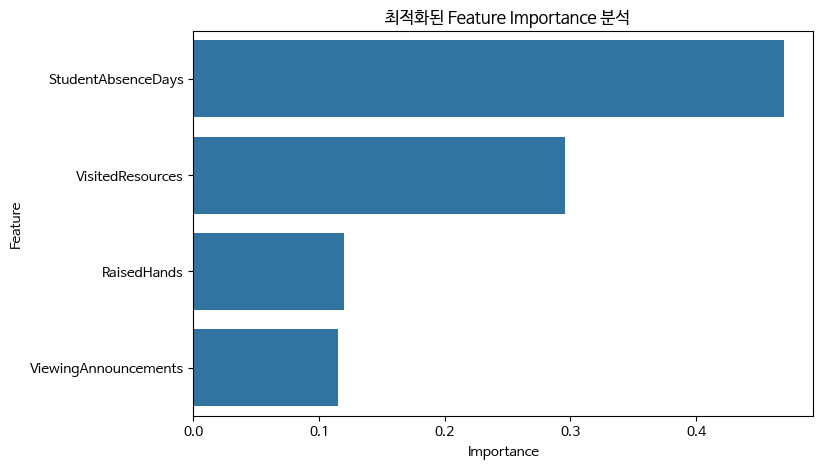

In [ ]:
# 📌 1️⃣ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 2️⃣ CSV 파일 불러오기
file_path = "processed_xAPI-Edu-Data.csv"
df = pd.read_csv(file_path)

# 📌 3️⃣ Feature Selection (필요 없는 변수 제거)
# 기존 Feature Importance 결과를 기반으로 의미 없는 변수 제거 가능
features = ["RaisedHands", "VisitedResources", "ViewingAnnouncements", "StudentAbsenceDays"]
X = df[features]  # Feature Selection 후 변수 선택
y = df["Class"]  # 타겟 변수 (성적 예측)

# 📌 4️⃣ 타겟 변수(Class) 변환: 숫자로 변환 (H > M > L)
class_mapping = {"L": 0, "M": 1, "H": 2}
y = y.map(class_mapping)

# 📌 5️⃣ 데이터 스케일링 (RobustScaler 사용 → 이상치 영향 최소화)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 📌 6️⃣ 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 7️⃣ 하이퍼파라미터 튜닝 (GridSearchCV 사용)
param_grid = {
    "n_estimators": [100, 200, 300],  # 트리 개수 증가
    "max_depth": [None, 10, 20, 30],  # 트리 깊이 최적화
    "min_samples_split": [2, 5, 10],  # 분할 최소 샘플 수
    "min_samples_leaf": [1, 2, 4]  # 리프 최소 샘플 수
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')  # 5-Fold CV
grid_search.fit(X_train, y_train)

# 📌 8️⃣ 최적 하이퍼파라미터 적용된 모델 학습
best_model = grid_search.best_estimator_

# 📌 9️⃣ 모델 예측 및 성능 평가
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 📌 🔟 결과 출력
print(f"\n📊 최적화된 Random Forest 모델 성능 평가")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# 📌 1️⃣1️⃣ Feature Importance 분석
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 📌 1️⃣2️⃣ Feature Importance 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("📊 최적화된 Feature Importance 분석")
plt.show()


In [ ]:
from joblib import dump

# 📌 최적화된 Random Forest 모델 저장
dump(best_model, "best_random_forest_model.joblib")  # 모델 저장
dump(scaler, "scaler.joblib")  # 스케일러 저장

print("✅ 모델이 'best_random_forest_model.joblib' 파일로 저장되었습니다.")


✅ 모델이 'best_random_forest_model.joblib' 파일로 저장되었습니다.


In [ ]:
from joblib import load

# 📌 저장된 모델 & 스케일러 불러오기
best_model = load("best_random_forest_model.joblib")
scaler = load("scaler.joblib")

print("✅ 모델이 정상적으로 불러와졌습니다!")


✅ 모델이 정상적으로 불러와졌습니다!


In [ ]:
# 📌 1️⃣ 필수 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from joblib import load

# 📌 2️⃣ 최적화된 모델 불러오기 (이미 학습된 Random Forest)
best_model = load("best_random_forest_model.joblib")  # 학습된 모델 불러오기

# 📌 3️⃣ 데이터 스케일링을 위한 Scaler 적용
scaler = load("scaler.joblib")  # 스케일러 불러오기

# 📌 4️⃣ 사용자 입력 받기
print("🎯 성적 예측을 위해 변수를 입력하세요!")
raised_hands = float(input("🙋‍♂️ 손을 든 횟수 (RaisedHands): "))
visited_resources = float(input("📚 학습 자료 방문 횟수 (VisitedResources): "))
viewing_announcements = float(input("📢 공지 확인 횟수 (ViewingAnnouncements): "))
student_absence_days = float(input("🚸 결석 일수 (StudentAbsenceDays): "))

# 📌 5️⃣ 입력된 값을 NumPy 배열로 변환
input_data = np.array([[raised_hands, visited_resources, viewing_announcements, student_absence_days]])

# 📌 6️⃣ 데이터 스케일링 적용 (훈련 데이터와 같은 방식)
input_data_scaled = scaler.transform(input_data)

# 📌 7️⃣ 모델 예측 수행
predicted_class_numeric = best_model.predict(input_data_scaled)

# 📌 8️⃣ 숫자를 등급(Class)으로 변환 (0 = L, 1 = M, 2 = H)
class_mapping_reverse = {0: "Low (L)", 1: "Medium (M)", 2: "High (H)"}
predicted_class = class_mapping_reverse[int(round(predicted_class_numeric[0]))]  # 가장 가까운 정수 변환

# 📌 9️⃣ 결과 출력
print("\n📊 예측 결과: 입력된 값에 대한 예상 성적(Class)은...")
print(f"🎯 예상 성적: {predicted_class} \n")
ㄴ

🎯 성적 예측을 위해 변수를 입력하세요!
🙋‍♂️ 손을 든 횟수 (RaisedHands): 15
📚 학습 자료 방문 횟수 (VisitedResources): 20
📢 공지 확인 횟수 (ViewingAnnouncements): 30
🚸 결석 일수 (StudentAbsenceDays): 1

📊 예측 결과: 입력된 값에 대한 예상 성적(Class)은...
🎯 예상 성적: Medium (M) 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
